In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from collections import Counter
from IPython.display import Image
from sklearn.impute import SimpleImputer
import seaborn as sns
from ydata_profiling import profile_report

In [21]:
#load dataset
df=pd.read_csv('patient data.csv')

In [23]:
df.shape

(4999, 35)

In [79]:
df.head(3)

,PatientID,State,Sex,GeneralHealth,AgeCategory,HeightInMeters,WeightInKilograms,BMI,HadHeartAttack,HadAngina,...,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,1,Alabama,Female,Fair,Age 75 to 79,1.63,84.820000,32.099998,0.0,1,...,Never used e-cigarettes in my entire life,1,"White only, Non-Hispanic",0,0,0,1,"No, did not receive any tetanus shot in the pa...",0,1
1,2,Alabama,Female,Very good,Age 65 to 69,1.60,71.669998,27.990000,NaN,0,...,Never used e-cigarettes in my entire life,0,"White only, Non-Hispanic",0,0,1,1,"Yes, received Tdap",0,0
2,3,Alabama,Male,Excellent,Age 60 to 64,1.78,71.209999,22.530001,0.0,0,...,Never used e-cigarettes in my entire life,0,"White only, Non-Hispanic",1,0,0,0,"Yes, received tetanus shot but not sure what type",0,0


In [27]:
df.isnull().sum()

PatientID                     0
State                         0
Sex                           0
GeneralHealth                 2
AgeCategory                   0
HeightInMeters               45
WeightInKilograms             1
BMI                           5
HadHeartAttack                5
HadAngina                     0
HadStroke                     0
HadAsthma                     0
HadSkinCancer                 0
HadCOPD                       0
HadDepressiveDisorder         0
HadKidneyDisease              0
HadArthritis                  0
HadDiabetes                   0
DeafOrHardOfHearing           0
BlindOrVisionDifficulty       0
DifficultyConcentrating       0
DifficultyWalking             0
DifficultyDressingBathing     1
DifficultyErrands             0
SmokerStatus                  0
ECigaretteUsage               0
ChestScan                     0
RaceEthnicityCategory         0
AlcoholDrinkers               0
HIVTesting                    0
FluVaxLast12                  0
PneumoVa

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  4999 non-null   int64  
 1   State                      4999 non-null   object 
 2   Sex                        4999 non-null   object 
 3   GeneralHealth              4997 non-null   object 
 4   AgeCategory                4999 non-null   object 
 5   HeightInMeters             4954 non-null   float64
 6   WeightInKilograms          4998 non-null   float64
 7   BMI                        4994 non-null   float64
 8   HadHeartAttack             4994 non-null   float64
 9   HadAngina                  4999 non-null   int64  
 10  HadStroke                  4999 non-null   int64  
 11  HadAsthma                  4999 non-null   int64  
 12  HadSkinCancer              4999 non-null   int64  
 13  HadCOPD                    4999 non-null   int64

In [33]:
df.describe()

,PatientID,HeightInMeters,WeightInKilograms,BMI,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,...,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,ChestScan,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,HighRiskLastYear,CovidPos
count,4999.000000,4954.000000,4998.000000,4994.000000,4994.000000,4999.000000,4999.00000,4999.000000,4999.000000,4999.000000,...,4999.000000,4998.000000,4999.000000,4999.000000,4999.00000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000
mean,2500.000000,1.707893,84.227697,28.792535,0.059471,0.068214,0.04901,0.145229,0.078216,0.087217,...,0.164433,0.042017,0.074815,0.441488,0.50050,0.377075,0.476295,0.384477,0.041008,0.332066
std,1443.231328,0.105670,21.215180,6.484308,0.236528,0.252137,0.21591,0.352367,0.268537,0.282182,...,0.370705,0.200648,0.263119,0.496614,0.50005,0.484703,0.499488,0.486520,0.198329,0.471002
min,1.000000,1.220000,35.380001,12.940000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1250.500000,1.630000,68.949997,24.370001,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2500.000000,1.700000,81.650002,27.785001,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3749.500000,1.780000,95.250000,31.930000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.00000,1.000000,1.000000,1.000000,0.000000,1.000000
max,4999.000000,2.160000,249.479996,91.550003,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
df.duplicated().sum()

0

In [41]:
df.dtypes

PatientID                      int64
State                         object
Sex                           object
GeneralHealth                 object
AgeCategory                   object
HeightInMeters               float64
WeightInKilograms            float64
BMI                          float64
HadHeartAttack               float64
HadAngina                      int64
HadStroke                      int64
HadAsthma                      int64
HadSkinCancer                  int64
HadCOPD                        int64
HadDepressiveDisorder          int64
HadKidneyDisease               int64
HadArthritis                   int64
HadDiabetes                   object
DeafOrHardOfHearing            int64
BlindOrVisionDifficulty        int64
DifficultyConcentrating        int64
DifficultyWalking              int64
DifficultyDressingBathing    float64
DifficultyErrands              int64
SmokerStatus                  object
ECigaretteUsage               object
ChestScan                      int64
R

In [53]:
df.columns

Index(['PatientID', 'State', 'Sex', 'GeneralHealth', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'HadHeartAttack',
       'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory',
       'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver',
       'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos'],
      dtype='object')

In [61]:
datacolumns=['State', 'Sex', 'GeneralHealth', 'AgeCategory',
       'HeightInMeters', 'HadHeartAttack', 'HadAngina', 
        'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory',
       'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver',
       'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos']

In [63]:
type(datacolumns)

list

In [73]:
for i in datacolumns:
    print(df[i].value_counts()," \n=======\n=======")

State
Alaska     2831
Alabama    1880
Arizona     288
Name: count, dtype: int64  
Sex
Female    2633
Male      2366
Name: count, dtype: int64  
GeneralHealth
Very good    1719
Good         1616
Excellent     754
Fair          665
Poor          243
Name: count, dtype: int64  
AgeCategory
Age 65 to 69       613
Age 60 to 64       567
Age 70 to 74       534
Age 55 to 59       489
Age 50 to 54       392
Age 75 to 79       358
Age 80 or older    357
Age 45 to 49       347
Age 40 to 44       326
Age 35 to 39       320
Age 30 to 34       251
Age 18 to 24       238
Age 25 to 29       207
Name: count, dtype: int64  
HeightInMeters
1.63    434
1.78    428
1.70    420
1.68    415
1.65    395
1.75    362
1.73    359
1.83    347
1.80    313
1.60    311
1.57    267
1.85    201
1.55    160
1.52    155
1.88    127
1.91     73
1.93     55
1.50     47
1.47     21
1.96     21
1.98     18
1.45      6
2.01      6
1.42      4
1.22      3
2.03      2
1.35      1
1.76      1
2.16      1
1.53      1
Name: coun

In [83]:
cat_features = df.select_dtypes(include = 'object').columns
num_features = df.select_dtypes(include = ['int', 'float']).columns


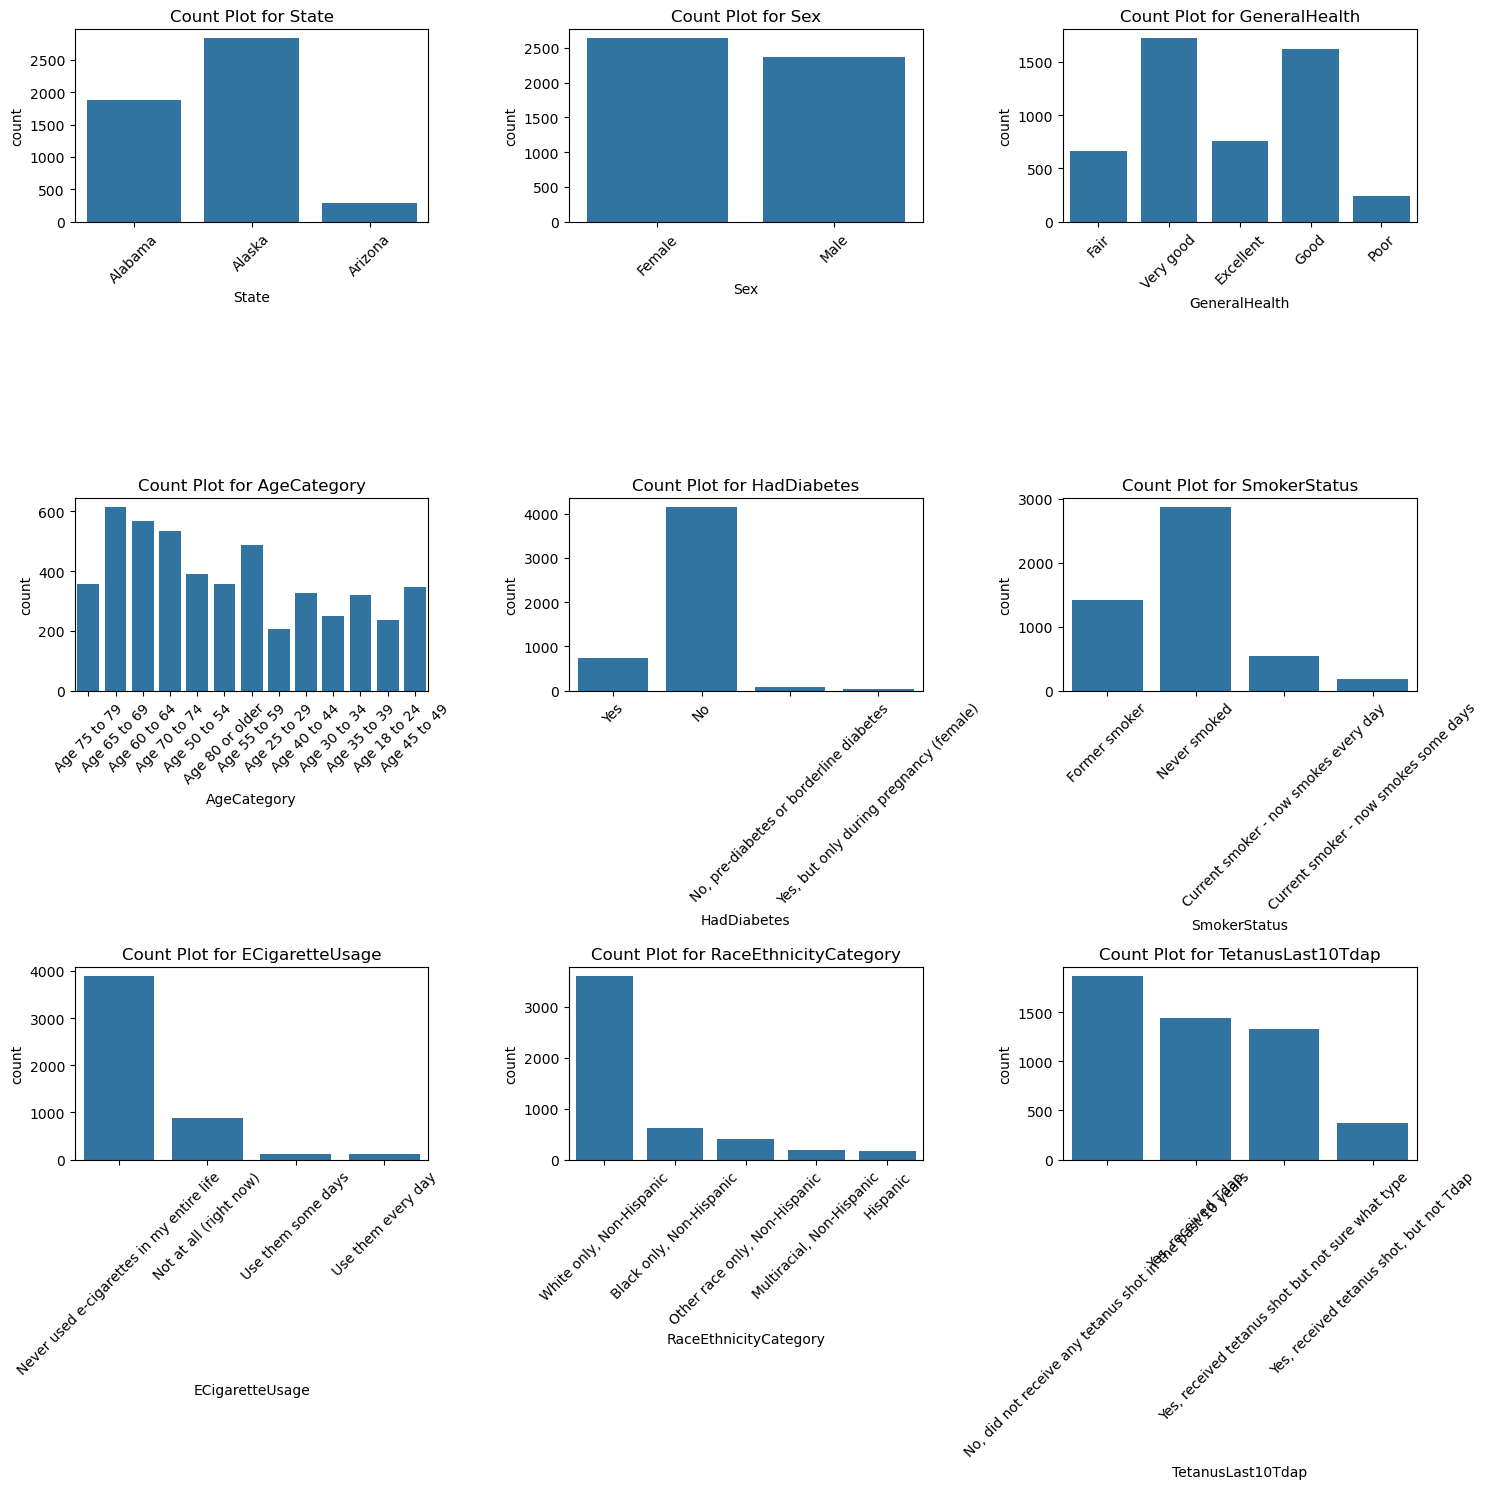

In [85]:
# Adjust the figure size and layout for better visualization
fig, ax = plt.subplots(
    nrows=int(np.ceil(len(cat_features) / 3)), 
    ncols=3, 
    figsize=(15, 5 * int(np.ceil(len(cat_features) / 3)))  # Dynamically adjust figure size
)

# Flatten the axes array for easier iteration
ax = ax.flatten()

# Loop through categorical features and create count plots
for i, column in enumerate(cat_features):
    sns.countplot(data=df, x=column, ax=ax[i])
    ax[i].set_title(f"Count Plot for {column}", fontsize=12)  # Add a title
    ax[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Hide any unused subplots
for j in range(len(cat_features), len(ax)):
    fig.delaxes(ax[j])

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

In [87]:
encoder = LabelEncoder()
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    df[col] = encoder.fit_transform(df[col])


In [89]:
numeric_columns = df.select_dtypes(include=['number']).columns
print(numeric_columns)

Index(['PatientID', 'State', 'Sex', 'GeneralHealth', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'HadHeartAttack',
       'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory',
       'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver',
       'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos'],
      dtype='object')


In [91]:
scaler = StandardScaler()
scaled_columns = scaler.fit_transform(df[numeric_columns])
df.head(3)

,PatientID,State,Sex,GeneralHealth,AgeCategory,HeightInMeters,WeightInKilograms,BMI,HadHeartAttack,HadAngina,...,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,1,0,0,1,11,1.63,84.820000,32.099998,0.0,1,...,0,1,4,0,0,0,1,0,0,1
1,2,0,0,4,9,1.60,71.669998,27.990000,NaN,0,...,0,0,4,0,0,1,1,1,0,0
2,3,0,1,0,8,1.78,71.209999,22.530001,0.0,0,...,0,0,4,1,0,0,0,2,0,0


In [93]:
# Define the target column
target_column = 'HadDiabetes'

# Separate features (X) and target (y)
X = df.drop(columns=[target_column])
y = df[target_column]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [95]:
imputer = SimpleImputer(strategy='mean')
imputed_col = ['HeightInMeters','BMI','HadHeartAttack','WeightInKilograms','DifficultyDressingBathing']
df[imputed_col]= imputer.fit_transform(df[imputed_col])
df.isnull().sum()

PatientID                    0
State                        0
Sex                          0
GeneralHealth                0
AgeCategory                  0
HeightInMeters               0
WeightInKilograms            0
BMI                          0
HadHeartAttack               0
HadAngina                    0
HadStroke                    0
HadAsthma                    0
HadSkinCancer                0
HadCOPD                      0
HadDepressiveDisorder        0
HadKidneyDisease             0
HadArthritis                 0
HadDiabetes                  0
DeafOrHardOfHearing          0
BlindOrVisionDifficulty      0
DifficultyConcentrating      0
DifficultyWalking            0
DifficultyDressingBathing    0
DifficultyErrands            0
SmokerStatus                 0
ECigaretteUsage              0
ChestScan                    0
RaceEthnicityCategory        0
AlcoholDrinkers              0
HIVTesting                   0
FluVaxLast12                 0
PneumoVaxEver                0
TetanusL

In [97]:
top = df['GeneralHealth'].value_counts().head(6)
top

GeneralHealth
4    1719
2    1616
0     754
1     665
3     243
5       2
Name: count, dtype: int64

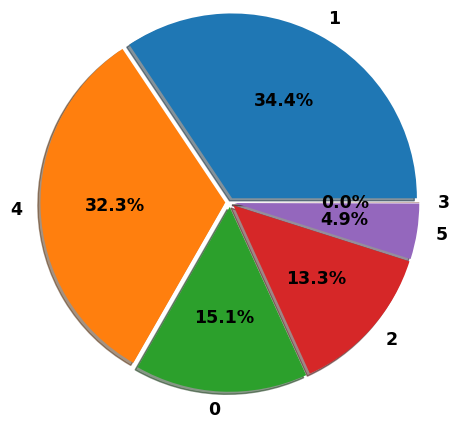

In [127]:
plt.figure(figsize=(4,3))
plt.pie(top,labels = df['GeneralHealth'].unique()[0:6],autopct='%1.1f%%',radius=2,explode = (0.05,0.05, 0.05,0.05,0.05,0.05),shadow=True,textprops={'color':'black','weight':'bold','fontsize':12.5})
plt.show()

In [113]:
df['SmokerStatus'].value_counts()

SmokerStatus
3    2866
2    1420
0     535
1     178
Name: count, dtype: int64

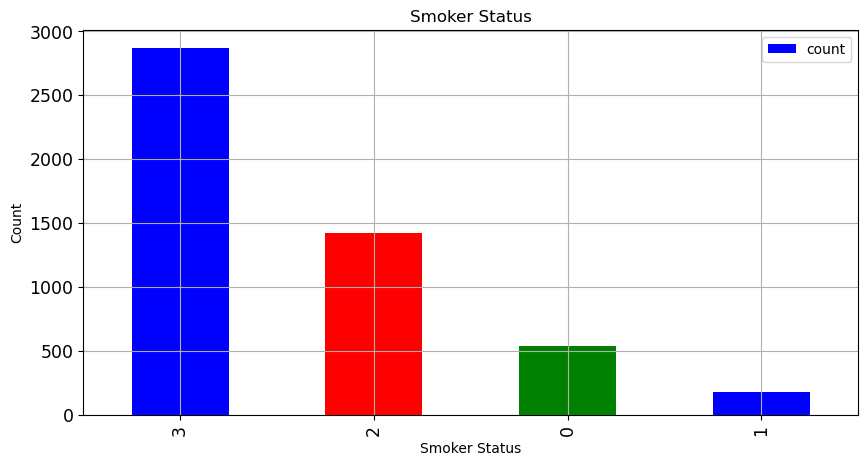

In [115]:
df['SmokerStatus'].value_counts().plot(kind='bar',color=['blue','red','green'],figsize=(10,5),title='Smoker Status',xlabel='Smoker Status',ylabel='Count',grid=True,legend=True,fontsize=12.5)
plt.show()

Text(0.5, 0, 'BMI')

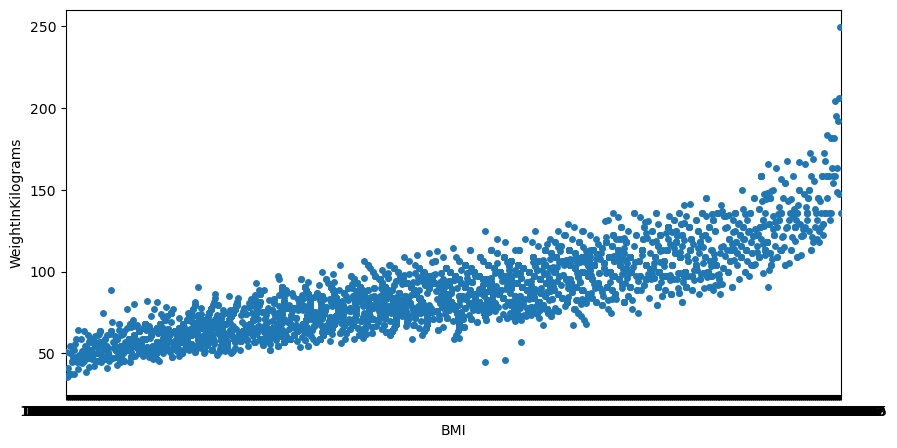

In [117]:
plt.figure(figsize=(10,5))
ax = sns.stripplot(x='BMI', y= 'WeightInKilograms',data= df)
plt.ylabel('WeightInKilograms')
plt.xlabel('BMI')

Text(0.5, 0, 'HeightInMeters')

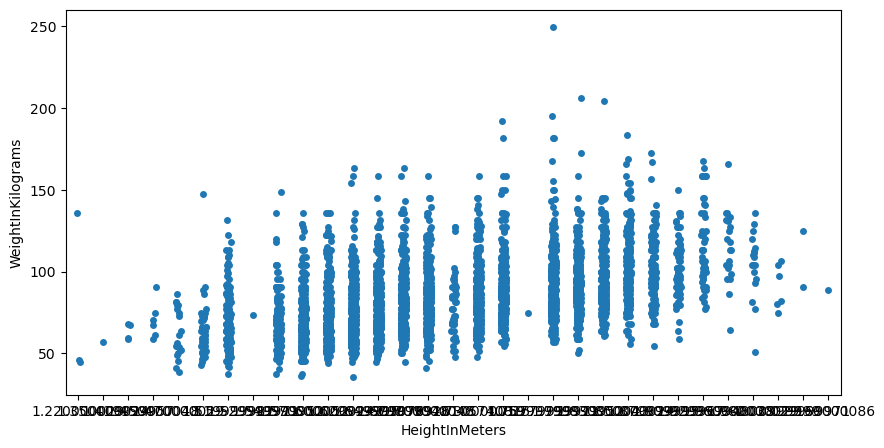

In [169]:
plt.figure(figsize=(10,5))
ax = sns.stripplot(x='HeightInMeters', y= 'WeightInKilograms',data= df)
plt.ylabel('WeightInKilograms')
plt.xlabel('HeightInMeters')

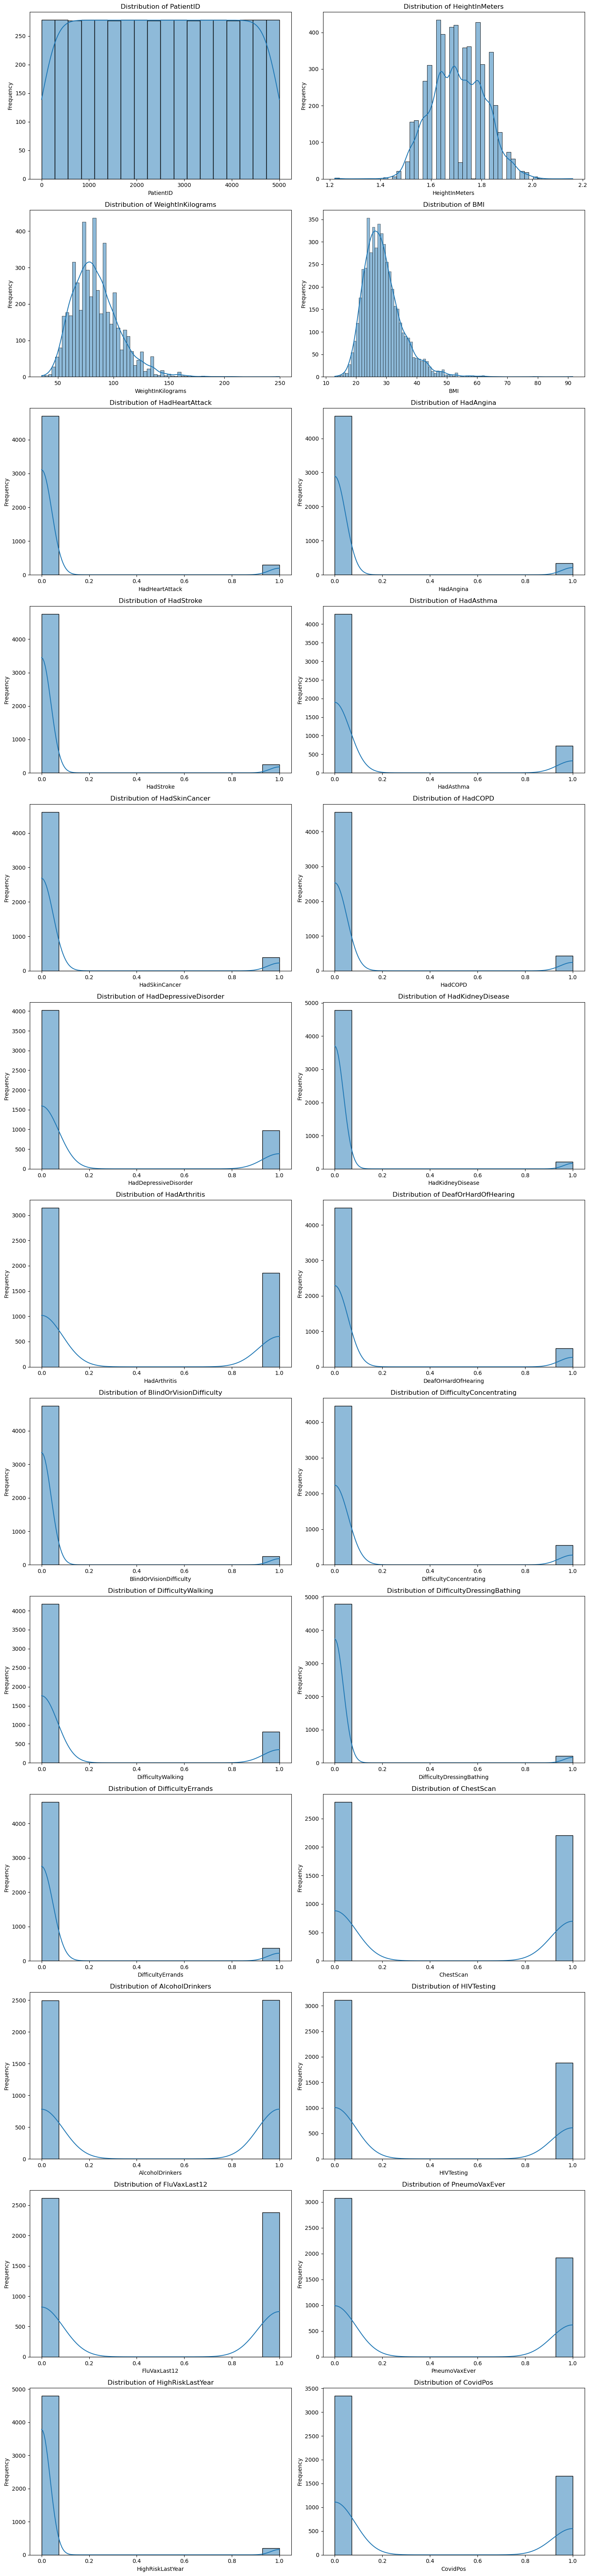

In [118]:
# Adjust the number of rows and columns dynamically based on the number of numeric features
nrows = int(np.ceil(len(num_features) / 2))  # Adjust rows based on the number of features
ncols = 2  # Fixed number of columns

# Create subplots with an appropriate figure size
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Loop through numeric features and create histograms
for i, column in enumerate(num_features):
    sns.histplot(df[column], kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {column}", fontsize=12)  # Add a title
    axes[i].set_xlabel(column, fontsize=10)  # Set x-axis label
    axes[i].set_ylabel("Frequency", fontsize=10)  # Set y-axis label

# Hide any unused subplots
for j in range(len(num_features), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

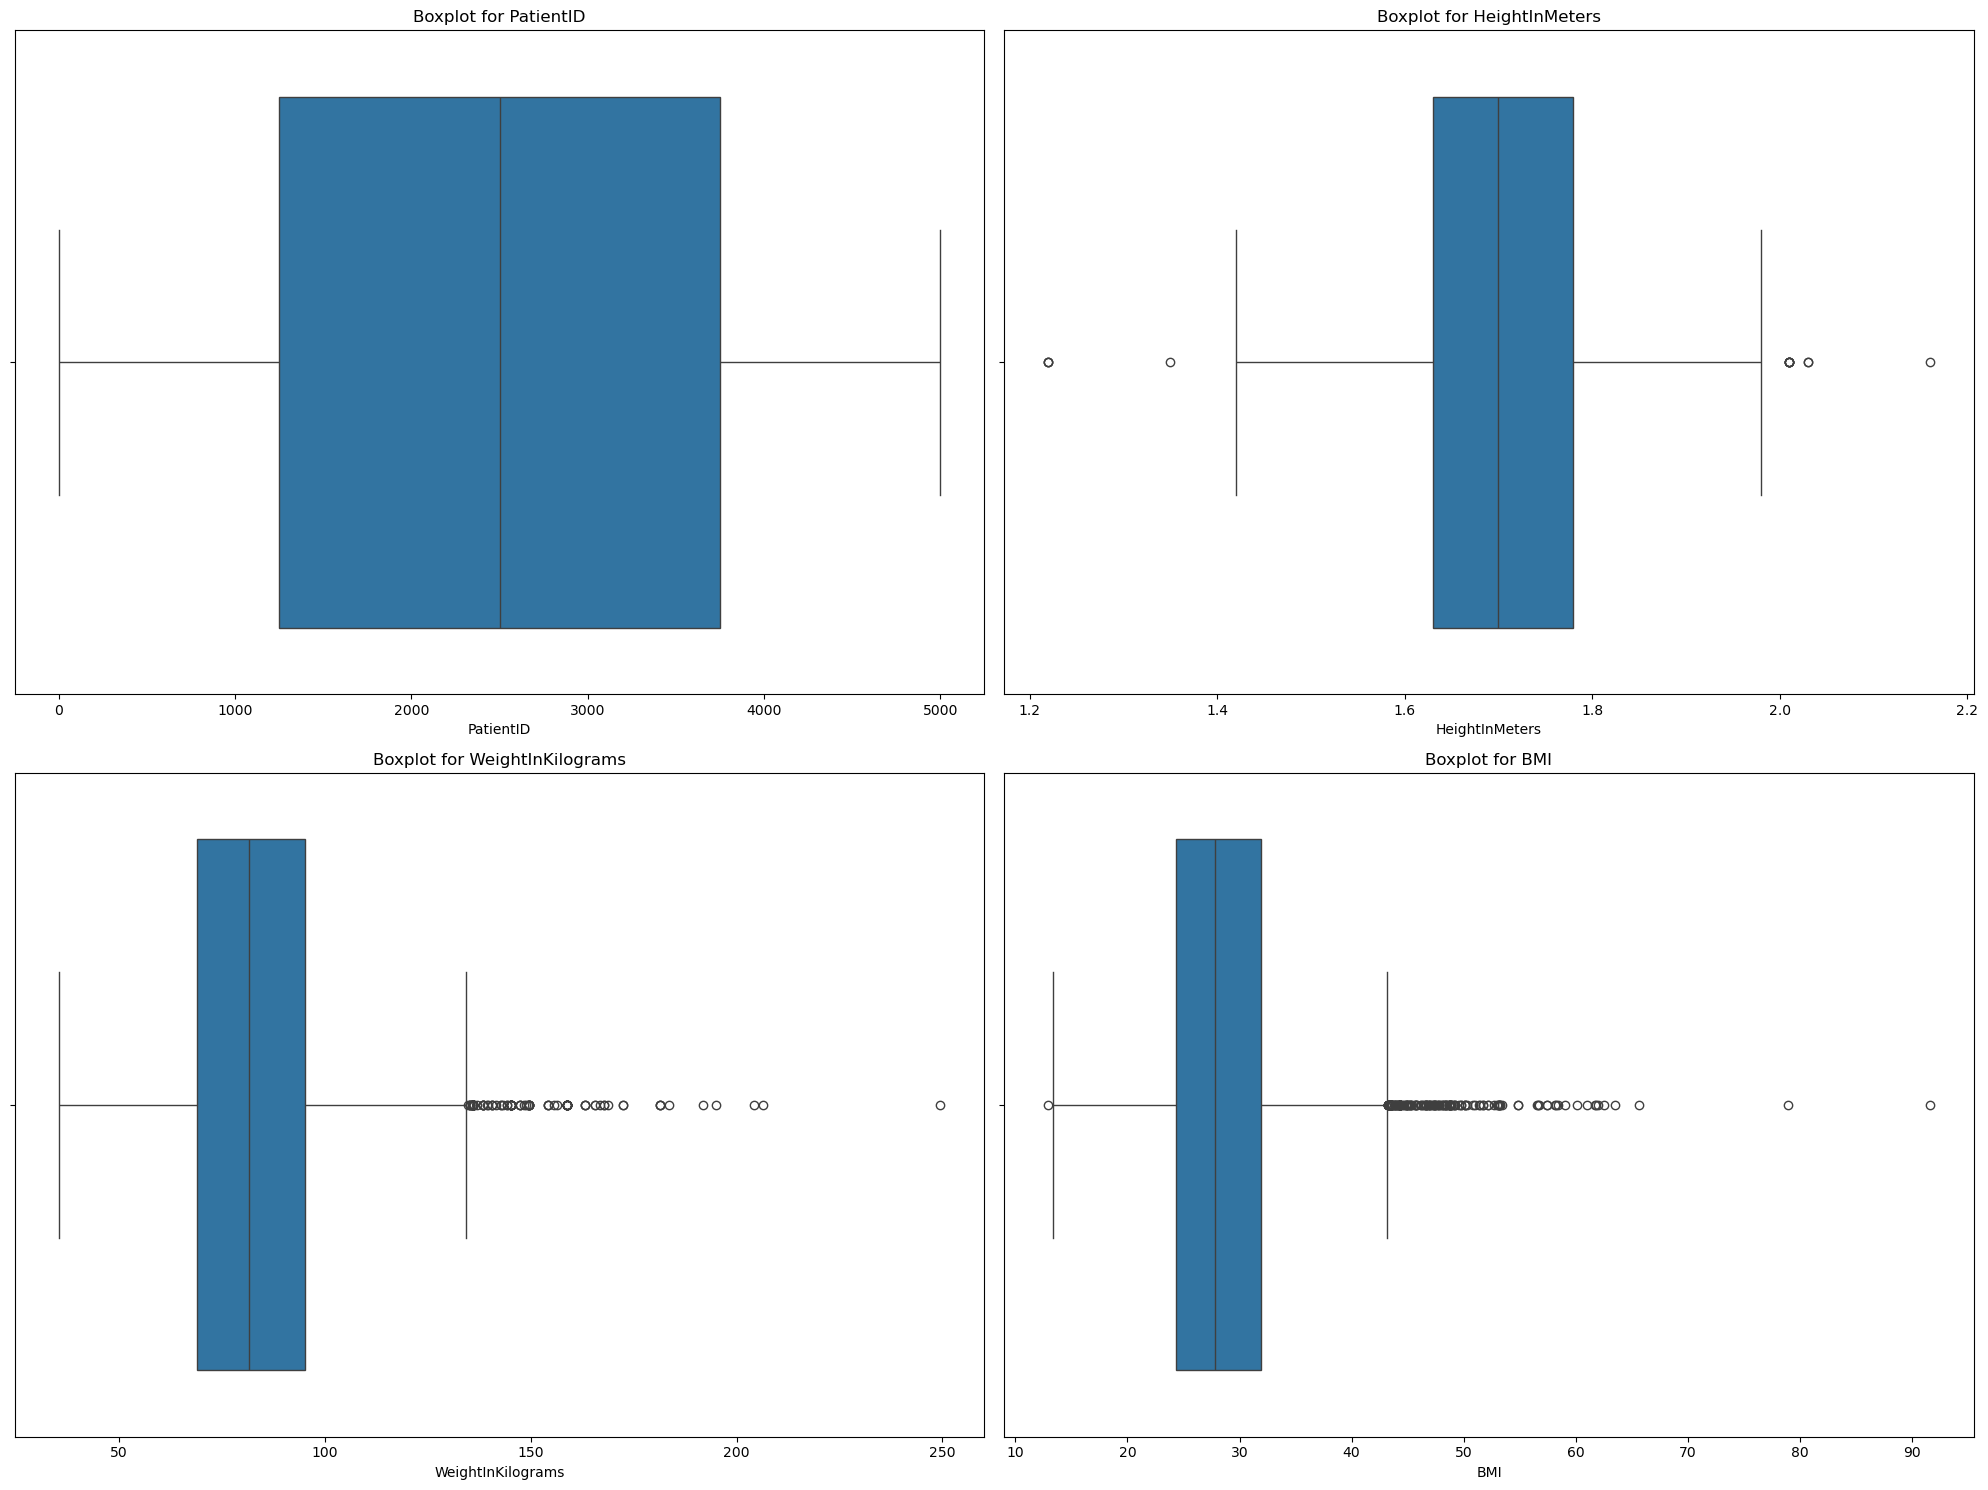

In [119]:
# Limit to the first four numeric features
limited_num_features = num_features[:4]

# Create subplots for the first four boxplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 15))
axes = axes.flatten()

# Loop through the first four numeric features and create boxplots
for i, column in enumerate(limited_num_features):
    sns.boxplot(data=df, x=column, ax=axes[i])
    axes[i].set_title(f"Boxplot for {column}", fontsize=12)  # Add a title
    axes[i].set_xlabel(column, fontsize=10)  # Set x-axis label

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

<Axes: >

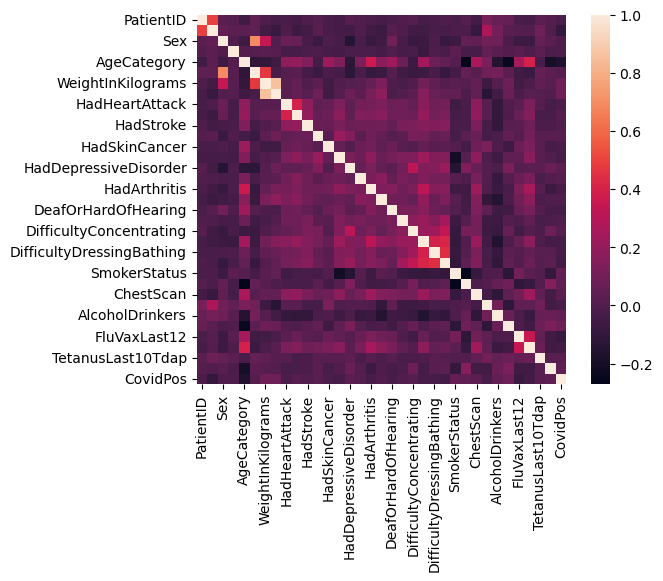

In [129]:
f, ax = plt.subplots()
corr = df.corr()
sns.heatmap(corr,annot = False, square=True, ax=ax)

In [151]:
from ydata_profiling import ProfileReport

In [157]:
patientreport = ProfileReport(df, title="Patient Report")

In [163]:
patientreport.to_file("patientreport.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\L.O.Q\anaconda3\Lib\site-packages\ydata_profiling\model\pandas\discretize_pandas.py:52: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 0 0 ... 9 9 4]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  discretized_df.loc[:, column] = self._discretize_column(
C:\Users\L.O.Q\anaconda3\Lib\site-packages\ydata_profiling\model\pandas\discretize_pandas.py:52: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 0 9 ... 9 0 0]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  discretized_df.loc[:, column] = self._discretize_column(
C:\Users\L.O.Q\anaconda3\Lib\site-packages\ydata_profiling\model\pandas\discretize_pandas.py:52: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1 7 0 ... 0 5 0]' has dt

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]